In [1]:
import numpy as np
import pandas as pd

In [2]:
loan_data_inputs_train = pd.read_csv('loan_data_inputs_train.csv', index_col = 0)
loan_data_targets_train = pd.read_csv('loan_data_targets_train.csv', index_col=0)
loan_data_targets_test  = pd.read_csv('loan_data_targets_test.csv', index_col=0)
loan_data_inputs_test = pd.read_csv('loan_data_inputs_test.csv', index_col = 0)

In [3]:
loan_data_inputs_train.shape

(373028, 324)

In [4]:
loan_data_targets_train.shape

(373028, 1)

In [5]:
loan_data_inputs_test.shape

(93257, 324)

In [6]:
loan_data_targets_test.shape

(93257, 1)

In [7]:
# Here we select a limited set of input variables in a new dataframe.
inputs_train_with_ref_cat = loan_data_inputs_train.loc[: , ['grade:A',
'grade:B',
'grade:C',
'grade:D',
'grade:E',
'grade:F',
'grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'home_ownership:OWN',
'home_ownership:MORTGAGE',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'addr_state:NM_VA',
'addr_state:NY',
'addr_state:OK_TN_MO_LA_MD_NC',
'addr_state:CA',
'addr_state:UT_KY_AZ_NJ',
'addr_state:AR_MI_PA_OH_MN',
'addr_state:RI_MA_DE_SD_IN',
'addr_state:GA_WA_OR',
'addr_state:WI_MT',
'addr_state:TX',
'addr_state:IL_CT',
'addr_state:KS_SC_CO_VT_AK_MS',
'addr_state:WV_NH_WY_DC_ME_ID',
'verification_status:Not Verified',
'verification_status:Source Verified',
'verification_status:Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'purpose:credit_card',
'purpose:debt_consolidation',
'purpose:oth__med__vacation',
'purpose:major_purch__car__home_impr',
'initial_list_status:f',
'initial_list_status:w',
'term:36',
'term:60',
'emp_length:0',
'emp_length:1',
'emp_length:2-4',
'emp_length:5-6',
'emp_length:7-9',
'emp_length:10',
'mths_since_issue_d:<38',
'mths_since_issue_d:38-39',
'mths_since_issue_d:40-41',
'mths_since_issue_d:42-48',
'mths_since_issue_d:49-52',
'mths_since_issue_d:53-64',
'mths_since_issue_d:65-84',
'mths_since_issue_d:>84',
'int_rate:<9.548',
'int_rate:9.548-12.025',
'int_rate:12.025-15.74',
'int_rate:15.74-20.281',
'int_rate:>20.281',
'mths_since_earliest_cr_line:<140',
'mths_since_earliest_cr_line:141-164',
'mths_since_earliest_cr_line:165-247',
'mths_since_earliest_cr_line:248-270',
'mths_since_earliest_cr_line:271-352',
'mths_since_earliest_cr_line:>352',
'delinq_2yrs:0',
'delinq_2yrs:1-3',
'delinq_2yrs:>=4',
'inq_last_6mths:0',
'inq_last_6mths:1-2',
'inq_last_6mths:3-6',
'inq_last_6mths:>6',
'open_acc:0',
'open_acc:1-3',
'open_acc:4-12',
'open_acc:13-17',
'open_acc:18-22',
'open_acc:23-25',
'open_acc:26-30',
'open_acc:>=31',
'pub_rec:0-2',
'pub_rec:3-4',
'pub_rec:>=5',
'total_acc:<=27',
'total_acc:28-51',
'total_acc:>=52',
'acc_now_delinq:0',
'acc_now_delinq:>=1',
'total_rev_hi_lim:<=5K',
'total_rev_hi_lim:5K-10K',
'total_rev_hi_lim:10K-20K',
'total_rev_hi_lim:20K-30K',
'total_rev_hi_lim:30K-40K',
'total_rev_hi_lim:40K-55K',
'total_rev_hi_lim:55K-95K',
'total_rev_hi_lim:>95K',
'annual_inc:<20K',
'annual_inc:20K-30K',
'annual_inc:30K-40K',
'annual_inc:40K-50K',
'annual_inc:50K-60K',
'annual_inc:60K-70K',
'annual_inc:70K-80K',
'annual_inc:80K-90K',
'annual_inc:90K-100K',
'annual_inc:100K-120K',
'annual_inc:120K-140K',
'annual_inc:>140K',
'dti:<=1.4',
'dti:1.4-3.5',
'dti:3.5-7.7',
'dti:7.7-10.5',
'dti:10.5-16.1',
'dti:16.1-20.3',
'dti:20.3-21.7',
'dti:21.7-22.4',
'dti:22.4-35',
'dti:>35',
'mths_since_last_delinq:Missing',
'mths_since_last_delinq:0-3',
'mths_since_last_delinq:4-30',
'mths_since_last_delinq:31-56',
'mths_since_last_delinq:>=57',
'mths_since_last_record:Missing',
'mths_since_last_record:0-2',
'mths_since_last_record:3-20',
'mths_since_last_record:21-31',
'mths_since_last_record:32-80',
'mths_since_last_record:81-86',
'mths_since_last_record:>86',
]]

In [8]:

ref_categories = ['grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'verification_status:Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'initial_list_status:f',
'term:60',
'emp_length:0',
'mths_since_issue_d:>84',
'int_rate:>20.281',
'mths_since_earliest_cr_line:<140',
'delinq_2yrs:>=4',
'inq_last_6mths:>6',
'open_acc:0',
'pub_rec:0-2',
'total_acc:<=27',
'acc_now_delinq:0',
'total_rev_hi_lim:<=5K',
'annual_inc:<20K',
'dti:>35',
'mths_since_last_delinq:0-3',
'mths_since_last_record:0-2']

In [9]:
inputs_train = inputs_train_with_ref_cat.drop(ref_categories, axis = 1)
inputs_train.head()

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:NM_VA,addr_state:NY,...,mths_since_last_delinq:Missing,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57,mths_since_last_record:Missing,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>86
427211,True,False,False,False,False,False,False,True,0,False,...,1,0,0,0,1,0,0,0,0,0
206088,False,False,True,False,False,False,False,True,0,False,...,0,1,0,0,1,0,0,0,0,0
136020,True,False,False,False,False,False,False,True,0,False,...,0,0,1,0,1,0,0,0,0,0
412305,False,False,False,True,False,False,False,False,0,False,...,0,1,0,0,1,0,0,0,0,0
36159,False,False,True,False,False,False,False,True,0,False,...,1,0,0,0,1,0,0,0,0,0


In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [11]:
reg = LogisticRegression()

In [12]:
reg.fit(inputs_train, loan_data_targets_train)

/home/aaron/anaconda3/envs/Universal/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/aaron/anaconda3/envs/Universal/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [13]:
reg.intercept_

array([0.86860108])

In [14]:
feature_name = inputs_train.columns.values

In [15]:
summary_table = pd.DataFrame(columns = ['Feature name'], data = feature_name)
summary_table['Coefficients'] = np.transpose(reg.coef_)
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['Intercept', reg.intercept_[0]]
summary_table = summary_table.sort_index()
summary_table

,Feature name,Coefficients
0,Intercept,0.868601
1,grade:A,1.031823
2,grade:B,0.821253
3,grade:C,0.621894
4,grade:D,0.455421
...,...,...
100,mths_since_last_record:3-20,-0.238888
101,mths_since_last_record:21-31,-0.337151
102,mths_since_last_record:32-80,-0.169402
103,mths_since_last_record:81-86,-0.493514


In [16]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression

class SklearnLogitWithP:
    def __init__(self, *args, **kwargs):
        # Default parameters for stable fitting
        if 'penalty' not in kwargs:
            kwargs['penalty'] = 'none'
        if 'max_iter' not in kwargs:
            kwargs['max_iter'] = 2000

        self.model = LogisticRegression(*args, **kwargs)

        # Track which columns are dropped at different stages
        self.dropped_columns = {
            "constant_or_zero_variance": [],
            "duplicate": [],
            "near_singular": []
        }

    def _to_dataframe(self, X):
        """Ensure the data is a pandas DataFrame with column names."""
        if isinstance(X, pd.DataFrame):
            return X.copy()
        elif isinstance(X, pd.Series):
            return X.to_frame()
        else:
            return pd.DataFrame(X, columns=[f"x{i}" for i in range(np.shape(X)[1])])

    def _convert_bool(self, X):
        """Convert boolean data to float type."""
        if isinstance(X, (pd.DataFrame, pd.Series)):
            return X.astype(float)
        return pd.DataFrame(X).astype(float)

    def _clean_X(self, X):
        """Clean input features: remove zero-variance and duplicate columns."""
        X = self._to_dataframe(X)

        # Drop zero variance columns
        zero_var_cols = X.columns[X.std() == 0].tolist()
        if zero_var_cols:
            self.dropped_columns["constant_or_zero_variance"].extend(zero_var_cols)
            X = X.drop(columns=zero_var_cols, errors='ignore')

        # Drop duplicate columns
        duplicate_cols = X.columns[X.columns.duplicated()].tolist()
        if duplicate_cols:
            self.dropped_columns["duplicate"].extend(duplicate_cols)
            X = X.loc[:, ~X.columns.duplicated()]

        # Add constant if not already present
        if 'const' not in X.columns:
            X = sm.add_constant(X, has_constant='add')

        return X

    def fit(self, X, y):
        """Fit both sklearn and statsmodels versions to get p-values."""
        X = self._convert_bool(X)
        y = self._convert_bool(y).squeeze()

        # Fit sklearn logistic regression
        self.model.fit(X, y)

        # Prepare data for statsmodels
        X_const = self._clean_X(X)

        try:
            sm_model = sm.Logit(y, X_const).fit(disp=False)
        except np.linalg.LinAlgError:
            # Handle near-singular matrix by dropping highly correlated columns
            X_const = self._to_dataframe(X_const)
            corr_matrix = X_const.corr().abs()
            corr_sum = corr_matrix.sum()
            keep_cols = corr_sum[corr_sum < X_const.shape[1]].index
            dropped_cols = set(X_const.columns) - set(keep_cols)
            X_const = X_const[keep_cols]
            self.dropped_columns["near_singular"] = list(dropped_cols)
            sm_model = sm.Logit(y, X_const).fit(disp=False)

        # Track the final columns used in the statsmodels regression
        X_const = self._to_dataframe(X_const)
        self.final_columns = list(X_const.columns)

        # Store results
        self.p_values = sm_model.pvalues
        self.coef_ = self.model.coef_
        self.intercept_ = self.model.intercept_
        self.std_err = sm_model.bse
        self.z_scores = sm_model.tvalues
        self.result = sm_model

        return self

    def summary(self):
        """Print the statsmodels regression summary."""
        if hasattr(self, 'result'):
            print(self.result.summary())
        else:
            print("Model not fitted yet. Please call .fit() first.")


In [17]:
reg = SklearnLogitWithP()

In [18]:
reg.fit(inputs_train, loan_data_targets_train)

/home/aaron/anaconda3/envs/Universal/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


In [19]:

summary_table = pd.DataFrame(columns = ['Feature name'], data = feature_name)
summary_table['Coefficients'] = np.transpose(reg.coef_)
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['Intercept', reg.intercept_[0]]
summary_table = summary_table.sort_index()
summary_table

,Feature name,Coefficients
0,Intercept,1.847841
1,grade:A,1.029363
2,grade:B,0.812014
3,grade:C,0.614563
4,grade:D,0.450311
...,...,...
100,mths_since_last_record:3-20,-0.408277
101,mths_since_last_record:21-31,-0.496263
102,mths_since_last_record:32-80,-0.319881
103,mths_since_last_record:81-86,-0.638497


In [20]:

p_values = reg.p_values

p_values = np.append(np.nan,np.array(p_values))
len(p_values)

105

In [21]:
summary_table

,Feature name,Coefficients
0,Intercept,1.847841
1,grade:A,1.029363
2,grade:B,0.812014
3,grade:C,0.614563
4,grade:D,0.450311
...,...,...
100,mths_since_last_record:3-20,-0.408277
101,mths_since_last_record:21-31,-0.496263
102,mths_since_last_record:32-80,-0.319881
103,mths_since_last_record:81-86,-0.638497


In [70]:
reg.p_values


const                           8.933848e-03
grade:A                         1.097412e-29
grade:B                         7.459921e-40
grade:C                         1.101920e-26
grade:D                         2.143115e-16
                                    ...     
mths_since_last_record:3-20     8.195568e-03
mths_since_last_record:21-31    6.711545e-04
mths_since_last_record:32-80    1.166562e-02
mths_since_last_record:81-86    3.421529e-06
mths_since_last_record:>86      2.367880e-06
Length: 104, dtype: float64

In [71]:
summary_table['p_values']= p_values

In [24]:
summary_table

,Feature name,Coefficients,p_values
0,Intercept,1.847841,NaN
1,grade:A,1.029363,8.933848e-03
2,grade:B,0.812014,1.097412e-29
3,grade:C,0.614563,7.459921e-40
4,grade:D,0.450311,1.101920e-26
...,...,...,...
100,mths_since_last_record:3-20,-0.408277,8.195568e-03
101,mths_since_last_record:21-31,-0.496263,6.711545e-04
102,mths_since_last_record:32-80,-0.319881,1.166562e-02
103,mths_since_last_record:81-86,-0.638497,3.421529e-06


In [25]:

inputs_train_with_ref_cat = loan_data_inputs_train.loc[: , ['grade:A',
'grade:B',
'grade:C',
'grade:D',
'grade:E',
'grade:F',
'grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'home_ownership:OWN',
'home_ownership:MORTGAGE',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'addr_state:NM_VA',
'addr_state:NY',
'addr_state:OK_TN_MO_LA_MD_NC',
'addr_state:CA',
'addr_state:UT_KY_AZ_NJ',
'addr_state:AR_MI_PA_OH_MN',
'addr_state:RI_MA_DE_SD_IN',
'addr_state:GA_WA_OR',
'addr_state:WI_MT',
'addr_state:TX',
'addr_state:IL_CT',
'addr_state:KS_SC_CO_VT_AK_MS',
'addr_state:WV_NH_WY_DC_ME_ID',
'verification_status:Not Verified',
'verification_status:Source Verified',
'verification_status:Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'purpose:credit_card',
'purpose:debt_consolidation',
'purpose:oth__med__vacation',
'purpose:major_purch__car__home_impr',
'initial_list_status:f',
'initial_list_status:w',
'emp_length:0',
'emp_length:1',
'emp_length:2-4',
'emp_length:5-6',
'emp_length:7-9',
'emp_length:10',
'mths_since_issue_d:<38',
'mths_since_issue_d:38-39',
'mths_since_issue_d:40-41',
'mths_since_issue_d:42-48',
'mths_since_issue_d:49-52',
'mths_since_issue_d:53-64',
'mths_since_issue_d:65-84',
'mths_since_issue_d:>84',
'int_rate:<9.548',
'int_rate:9.548-12.025',
'int_rate:12.025-15.74',
'int_rate:15.74-20.281',
'int_rate:>20.281',
'mths_since_earliest_cr_line:<140',
'mths_since_earliest_cr_line:141-164',
'mths_since_earliest_cr_line:165-247',
'mths_since_earliest_cr_line:248-270',
'mths_since_earliest_cr_line:271-352',
'mths_since_earliest_cr_line:>352',
'inq_last_6mths:0',
'inq_last_6mths:1-2',
'inq_last_6mths:3-6',
'inq_last_6mths:>6',
'acc_now_delinq:0',
'acc_now_delinq:>=1',
'annual_inc:<20K',
'annual_inc:20K-30K',
'annual_inc:30K-40K',
'annual_inc:40K-50K',
'annual_inc:50K-60K',
'annual_inc:60K-70K',
'annual_inc:70K-80K',
'annual_inc:80K-90K',
'annual_inc:90K-100K',
'annual_inc:100K-120K',
'annual_inc:120K-140K',
'annual_inc:>140K',
'dti:<=1.4',
'dti:1.4-3.5',
'dti:3.5-7.7',
'dti:7.7-10.5',
'dti:10.5-16.1',
'dti:16.1-20.3',
'dti:20.3-21.7',
'dti:21.7-22.4',
'dti:22.4-35',
'dti:>35',
'mths_since_last_delinq:Missing',
'mths_since_last_delinq:0-3',
'mths_since_last_delinq:4-30',
'mths_since_last_delinq:31-56',
'mths_since_last_delinq:>=57',
'mths_since_last_record:Missing',
'mths_since_last_record:0-2',
'mths_since_last_record:3-20',
'mths_since_last_record:21-31',
'mths_since_last_record:32-80',
'mths_since_last_record:81-86',
'mths_since_last_record:>86',
]]

ref_categories = ['grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'verification_status:Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'initial_list_status:f',
'emp_length:0',
'mths_since_issue_d:>84',
'int_rate:>20.281',
'mths_since_earliest_cr_line:<140',
'inq_last_6mths:>6',
'acc_now_delinq:0',
'annual_inc:<20K',
'dti:>35',
'mths_since_last_delinq:0-3',
'mths_since_last_record:0-2']

In [26]:
inputs_train = inputs_train_with_ref_cat.drop(ref_categories, axis = 1)
inputs_train.head()

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:NM_VA,addr_state:NY,...,mths_since_last_delinq:Missing,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57,mths_since_last_record:Missing,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>86
427211,True,False,False,False,False,False,False,True,0,False,...,1,0,0,0,1,0,0,0,0,0
206088,False,False,True,False,False,False,False,True,0,False,...,0,1,0,0,1,0,0,0,0,0
136020,True,False,False,False,False,False,False,True,0,False,...,0,0,1,0,1,0,0,0,0,0
412305,False,False,False,True,False,False,False,False,0,False,...,0,1,0,0,1,0,0,0,0,0
36159,False,False,True,False,False,False,False,True,0,False,...,1,0,0,0,1,0,0,0,0,0


In [66]:

reg2 = SklearnLogitWithP()
reg2.fit(inputs_train, loan_data_targets_train)

/home/aaron/anaconda3/envs/Universal/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


In [67]:
feature_name = inputs_train.columns.values

In [68]:

summary_table = pd.DataFrame(columns = ['Feature name'], data = feature_name)
summary_table['Coefficients'] = np.transpose(reg2.coef_)
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['Intercept', reg2.intercept_[0]]
summary_table = summary_table.sort_index()
summary_table

,Feature name,Coefficients
0,Intercept,2.235672
1,grade:A,1.023494
2,grade:B,0.804410
3,grade:C,0.608022
4,grade:D,0.444676
...,...,...
79,mths_since_last_record:3-20,-0.407134
80,mths_since_last_record:21-31,-0.508018
81,mths_since_last_record:32-80,-0.343487
82,mths_since_last_record:81-86,-0.667086


In [69]:
reg2.p_values

const                           9.203619e-12
grade:A                         6.960986e-30
grade:B                         6.385044e-40
grade:C                         8.721140e-27
grade:D                         1.672658e-16
                                    ...     
mths_since_last_record:3-20     6.541272e-03
mths_since_last_record:21-31    3.486504e-04
mths_since_last_record:32-80    5.105639e-03
mths_since_last_record:81-86    7.992535e-07
mths_since_last_record:>86      4.798064e-07
Length: 84, dtype: float64

In [73]:

summary_table['p_values'] = summary_table['Feature name'].map(reg2.p_values)
summary_table

,Feature name,Coefficients,p_values
0,Intercept,2.235672,NaN
1,grade:A,1.023494,6.960986e-30
2,grade:B,0.804410,6.385044e-40
3,grade:C,0.608022,8.721140e-27
4,grade:D,0.444676,1.672658e-16
...,...,...,...
79,mths_since_last_record:3-20,-0.407134,6.541272e-03
80,mths_since_last_record:21-31,-0.508018,3.486504e-04
81,mths_since_last_record:32-80,-0.343487,5.105639e-03
82,mths_since_last_record:81-86,-0.667086,7.992535e-07


In [74]:
import pickle
pickle.dump(reg2, open('pd_model.pkl', 'wb'))

In [91]:

inputs_test_with_ref_cat = loan_data_inputs_test.loc[: , ['grade:A',
'grade:B',
'grade:C',
'grade:D',
'grade:E',
'grade:F',
'grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'home_ownership:OWN',
'home_ownership:MORTGAGE',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'addr_state:NM_VA',
'addr_state:NY',
'addr_state:OK_TN_MO_LA_MD_NC',
'addr_state:CA',
'addr_state:UT_KY_AZ_NJ',
'addr_state:AR_MI_PA_OH_MN',
'addr_state:RI_MA_DE_SD_IN',
'addr_state:GA_WA_OR',
'addr_state:WI_MT',
'addr_state:TX',
'addr_state:IL_CT',
'addr_state:KS_SC_CO_VT_AK_MS',
'addr_state:WV_NH_WY_DC_ME_ID',
'verification_status:Not Verified',
'verification_status:Source Verified',
'verification_status:Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'purpose:credit_card',
'purpose:debt_consolidation',
'purpose:oth__med__vacation',
'purpose:major_purch__car__home_impr',
'initial_list_status:f',
'initial_list_status:w',
'emp_length:0',
'emp_length:1',
'emp_length:2-4',
'emp_length:5-6',
'emp_length:7-9',
'emp_length:10',
'mths_since_issue_d:<38',
'mths_since_issue_d:38-39',
'mths_since_issue_d:40-41',
'mths_since_issue_d:42-48',
'mths_since_issue_d:49-52',
'mths_since_issue_d:53-64',
'mths_since_issue_d:65-84',
'mths_since_issue_d:>84',
'int_rate:<9.548',
'int_rate:9.548-12.025',
'int_rate:12.025-15.74',
'int_rate:15.74-20.281',
'int_rate:>20.281',
'mths_since_earliest_cr_line:<140',
'mths_since_earliest_cr_line:141-164',
'mths_since_earliest_cr_line:165-247',
'mths_since_earliest_cr_line:248-270',
'mths_since_earliest_cr_line:271-352',
'mths_since_earliest_cr_line:>352',
'inq_last_6mths:0',
'inq_last_6mths:1-2',
'inq_last_6mths:3-6',
'inq_last_6mths:>6',
'acc_now_delinq:0',
'acc_now_delinq:>=1',
'annual_inc:<20K',
'annual_inc:20K-30K',
'annual_inc:30K-40K',
'annual_inc:40K-50K',
'annual_inc:50K-60K',
'annual_inc:60K-70K',
'annual_inc:70K-80K',
'annual_inc:80K-90K',
'annual_inc:90K-100K',
'annual_inc:100K-120K',
'annual_inc:120K-140K',
'annual_inc:>140K',
'dti:<=1.4',
'dti:1.4-3.5',
'dti:3.5-7.7',
'dti:7.7-10.5',
'dti:10.5-16.1',
'dti:16.1-20.3',
'dti:20.3-21.7',
'dti:21.7-22.4',
'dti:22.4-35',
'dti:>35',
'mths_since_last_delinq:Missing',
'mths_since_last_delinq:0-3',
'mths_since_last_delinq:4-30',
'mths_since_last_delinq:31-56',
'mths_since_last_delinq:>=57',
'mths_since_last_record:Missing',
'mths_since_last_record:0-2',
'mths_since_last_record:3-20',
'mths_since_last_record:21-31',
'mths_since_last_record:32-80',
'mths_since_last_record:81-86',
'mths_since_last_record:>86',
]]

ref_categories = ['grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'verification_status:Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'initial_list_status:f',
'emp_length:0',
'mths_since_issue_d:>84',
'int_rate:>20.281',
'mths_since_earliest_cr_line:<140',
'inq_last_6mths:>6',
'acc_now_delinq:0',
'annual_inc:<20K',
'dti:>35',
'mths_since_last_delinq:0-3',
'mths_since_last_record:0-2']

In [92]:
inputs_test = inputs_test_with_ref_cat.drop(ref_categories, axis = 1)
inputs_test.head()

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:NM_VA,addr_state:NY,...,mths_since_last_delinq:Missing,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57,mths_since_last_record:Missing,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>86
362514,False,False,True,False,False,False,False,True,0,False,...,1,0,0,0,1,0,0,0,0,0
288564,False,False,False,False,True,False,False,True,0,False,...,0,0,0,0,1,0,0,0,0,0
213591,False,False,True,False,False,False,False,True,0,False,...,0,0,1,0,1,0,0,0,0,0
263083,False,False,True,False,False,False,False,True,0,False,...,1,0,0,0,1,0,0,0,0,0
165001,True,False,False,False,False,False,False,True,0,False,...,0,0,1,0,1,0,0,0,0,0


In [93]:
y_hat_test = reg2.model.predict(inputs_test)

In [94]:
y_hat_test

array([1., 1., 1., ..., 1., 1., 1.])

In [95]:
y_hat_test_proba = reg2.model.predict_proba(inputs_test)

In [96]:
y_hat_test_proba

array([[0.09008636, 0.90991364],
       [0.14685847, 0.85314153],
       [0.11996408, 0.88003592],
       ...,
       [0.02790393, 0.97209607],
       [0.04117596, 0.95882404],
       [0.04646173, 0.95353827]])

In [97]:
y_hat_test_proba = y_hat_test_proba[: ][: , 1]

In [98]:
y_hat_test_proba

array([0.90991364, 0.85314153, 0.88003592, ..., 0.97209607, 0.95882404,
       0.95353827])

In [99]:
loan_data_targets_test_temp = loan_data_targets_test

In [100]:
loan_data_targets_test_temp.reset_index(drop = True, inplace = True)

In [101]:
df_actual_predicted_probs = pd.concat([loan_data_targets_test_temp, pd.DataFrame(y_hat_test_proba)], axis = 1)

In [102]:
df_actual_predicted_probs.shape

(93257, 2)

In [103]:
df_actual_predicted_probs.columns = ['loan_data_targets_test', 'y_hat_test_proba']

In [104]:
df_actual_predicted_probs.index = loan_data_inputs_test.index

In [105]:
df_actual_predicted_probs.head()

,loan_data_targets_test,y_hat_test_proba
362514,1,0.909914
288564,1,0.853142
213591,1,0.880036
263083,1,0.930734
165001,1,0.967990


In [126]:
tr = 0.7

df_actual_predicted_probs['y_hat_test'] = np.where(df_actual_predicted_probs['y_hat_test_proba'] > tr, 1, 0)

pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'], rownames = ['Actual'], colnames = ['Predicted'])

Predicted,0,1
Actual,,
0,508,9771
1,996,81982


In [127]:
pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'], rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]


Predicted,0,1
Actual,,
0,0.005447,0.104775
1,0.010680,0.879098


In [130]:

conf_matrix = pd.crosstab(
    df_actual_predicted_probs['loan_data_targets_test'],
    df_actual_predicted_probs['y_hat_test'],
    rownames=['Actual'],
    colnames=['Predicted']
)

# Calculate accuracy
cm_array = conf_matrix.to_numpy()

accuracy = np.trace(cm_array) / cm_array.sum()

print("Model Accuracy:", round(accuracy, 4))


Model Accuracy: 0.8845


In [129]:
cm_array

array([[  508,  9771],
       [  996, 81982]])

In [131]:
from sklearn.metrics import roc_curve, roc_auc_score

In [132]:
roc_curve(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test_proba'])

(array([0.        , 0.        , 0.        , ..., 0.99970814, 0.99970814,
        1.        ]),
 array([0.00000000e+00, 1.20513871e-05, 4.21798549e-04, ...,
        9.99963846e-01, 1.00000000e+00, 1.00000000e+00]),
 array([1.99595893, 0.99595893, 0.98872579, ..., 0.53085251, 0.5230032 ,
        0.49554367]))

In [133]:
fpr, tpr, thresholds = roc_curve(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test_proba'])

In [135]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

Text(0.5, 1.0, 'ROC curve')

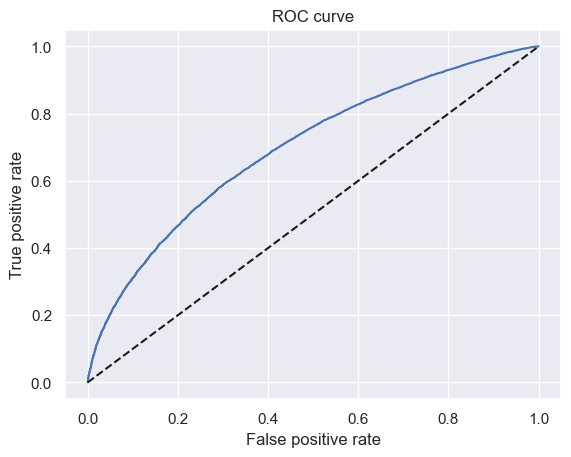

In [136]:
plt.plot(fpr, tpr)
# We plot the false positive rate along the x-axis and the true positive rate along the y-axis,
# thus plotting the ROC curve.
plt.plot(fpr, fpr, linestyle = '--', color = 'k')
# We plot a seconary diagonal line, with dashed line style and black color.
plt.xlabel('False positive rate')
# We name the x-axis "False positive rate".
plt.ylabel('True positive rate')
# We name the x-axis "True positive rate".
plt.title('ROC curve')
# We name the graph "ROC curve".

In [137]:
AUROC = roc_auc_score(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test_proba'])
# Calculates the Area Under the Receiver Operating Characteristic Curve (AUROC)
# from a set of actual values and their predicted probabilities.
AUROC

0.6963722588337998

In [138]:
df_actual_predicted_probs = df_actual_predicted_probs.sort_values('y_hat_test_proba')

In [139]:
df_actual_predicted_probs.head()

,loan_data_targets_test,y_hat_test_proba,y_hat_test
2808,0,0.495544,0
210472,0,0.510610,0
11208,0,0.517911,0
175979,1,0.523003,0
107466,1,0.526960,0


In [140]:
df_actual_predicted_probs = df_actual_predicted_probs.reset_index()

In [141]:
df_actual_predicted_probs['Cumulative N Population'] = df_actual_predicted_probs.index + 1
df_actual_predicted_probs['Cumulative N Good'] = df_actual_predicted_probs['loan_data_targets_test'].cumsum()
df_actual_predicted_probs['Cumulative N Bad'] = df_actual_predicted_probs['Cumulative N Population'] - df_actual_predicted_probs['loan_data_targets_test'].cumsum()


In [142]:
df_actual_predicted_probs['Cumulative Perc Population'] = df_actual_predicted_probs['Cumulative N Population'] / (df_actual_predicted_probs.shape[0])
# We calculate the cumulative percentage of all observations.
df_actual_predicted_probs['Cumulative Perc Good'] = df_actual_predicted_probs['Cumulative N Good'] / df_actual_predicted_probs['loan_data_targets_test'].sum()
# We calculate cumulative percentage of 'good'.
df_actual_predicted_probs['Cumulative Perc Bad'] = df_actual_predicted_probs['Cumulative N Bad'] / (df_actual_predicted_probs.shape[0] - df_actual_predicted_probs['loan_data_targets_test'].sum())
# We calculate the cumulative percentage of 'bad'.

In [143]:
df_actual_predicted_probs

,index,loan_data_targets_test,y_hat_test_proba,y_hat_test,Cumulative N Population,Cumulative N Good,Cumulative N Bad,Cumulative Perc Population,Cumulative Perc Good,Cumulative Perc Bad
0,2808,0,0.495544,0,1,0,1,0.000011,0.000000,0.000097
1,210472,0,0.510610,0,2,0,2,0.000021,0.000000,0.000195
2,11208,0,0.517911,0,3,0,3,0.000032,0.000000,0.000292
3,175979,1,0.523003,0,4,1,3,0.000043,0.000012,0.000292
4,107466,1,0.526960,0,5,2,3,0.000054,0.000024,0.000292
...,...,...,...,...,...,...,...,...,...,...
93252,42367,1,0.991967,1,93253,82974,10279,0.999957,0.999952,1.000000
93253,42315,1,0.992719,1,93254,82975,10279,0.999968,0.999964,1.000000
93254,42321,1,0.993303,1,93255,82976,10279,0.999979,0.999976,1.000000
93255,42098,1,0.995181,1,93256,82977,10279,0.999989,0.999988,1.000000


Text(0.5, 1.0, 'Gini')

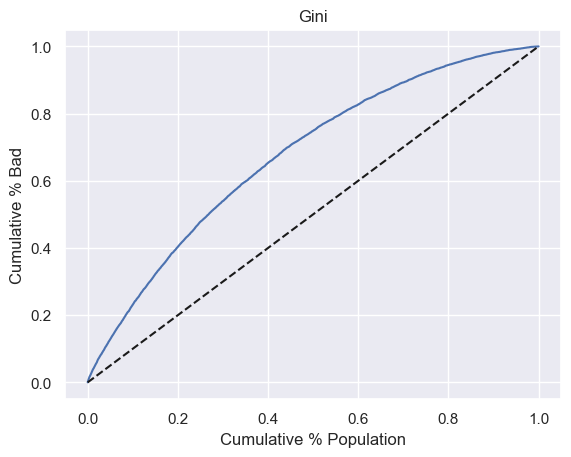

In [144]:
# Plot Gini
plt.plot(df_actual_predicted_probs['Cumulative Perc Population'], df_actual_predicted_probs['Cumulative Perc Bad'])
# We plot the cumulative percentage of all along the x-axis and the cumulative percentage 'good' along the y-axis,
# thus plotting the Gini curve.
plt.plot(df_actual_predicted_probs['Cumulative Perc Population'], df_actual_predicted_probs['Cumulative Perc Population'], linestyle = '--', color = 'k')
# We plot a seconary diagonal line, with dashed line style and black color.
plt.xlabel('Cumulative % Population')
# We name the x-axis "Cumulative % Population".
plt.ylabel('Cumulative % Bad')
# We name the y-axis "Cumulative % Bad".
plt.title('Gini')
# We name the graph "Gini".

In [145]:
Gini = AUROC * 2 - 1
# Here we calculate Gini from AUROC.
Gini

0.39274451766759966

Text(0.5, 1.0, 'Kolmogorov-Smirnov')

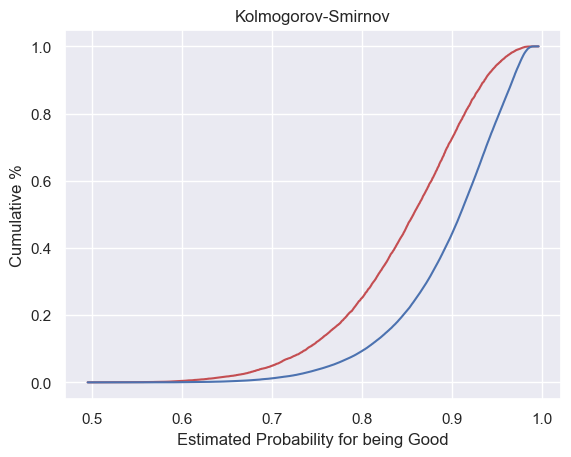

In [146]:
# Plot KS
plt.plot(df_actual_predicted_probs['y_hat_test_proba'], df_actual_predicted_probs['Cumulative Perc Bad'], color = 'r')
# We plot the predicted (estimated) probabilities along the x-axis and the cumulative percentage 'bad' along the y-axis,
# colored in red.
plt.plot(df_actual_predicted_probs['y_hat_test_proba'], df_actual_predicted_probs['Cumulative Perc Good'], color = 'b')
# We plot the predicted (estimated) probabilities along the x-axis and the cumulative percentage 'good' along the y-axis,
# colored in red.
plt.xlabel('Estimated Probability for being Good')
# We name the x-axis "Estimated Probability for being Good".
plt.ylabel('Cumulative %')
# We name the y-axis "Cumulative %".
plt.title('Kolmogorov-Smirnov')
# We name the graph "Kolmogorov-Smirnov".

In [148]:
KS = max(df_actual_predicted_probs['Cumulative Perc Bad'] - df_actual_predicted_probs['Cumulative Perc Good'])
KS

0.28886340145117173

In [149]:
summary_table

,Feature name,Coefficients,p_values
0,Intercept,2.235672,NaN
1,grade:A,1.023494,6.960986e-30
2,grade:B,0.804410,6.385044e-40
3,grade:C,0.608022,8.721140e-27
4,grade:D,0.444676,1.672658e-16
...,...,...,...
79,mths_since_last_record:3-20,-0.407134,6.541272e-03
80,mths_since_last_record:21-31,-0.508018,3.486504e-04
81,mths_since_last_record:32-80,-0.343487,5.105639e-03
82,mths_since_last_record:81-86,-0.667086,7.992535e-07


In [150]:
y_hat_test_proba

array([0.90991364, 0.85314153, 0.88003592, ..., 0.97209607, 0.95882404,
       0.95353827])

In [151]:
df_ref_categories = pd.DataFrame(ref_categories, columns = ['Feature name'])
df_ref_categories['Coefficients'] = 0
df_ref_categories['p_values'] = np.nan
df_ref_categories

,Feature name,Coefficients,p_values
0,grade:G,0,NaN
1,home_ownership:RENT_OTHER_NONE_ANY,0,NaN
2,addr_state:ND_NE_IA_NV_FL_HI_AL,0,NaN
3,verification_status:Verified,0,NaN
4,purpose:educ__sm_b__wedd__ren_en__mov__house,0,NaN
5,initial_list_status:f,0,NaN
6,emp_length:0,0,NaN
7,mths_since_issue_d:>84,0,NaN
8,int_rate:>20.281,0,NaN
9,mths_since_earliest_cr_line:<140,0,NaN


In [153]:
df_scorecard = pd.concat([summary_table, df_ref_categories])
df_scorecard = df_scorecard.reset_index()
df_scorecard

,index,Feature name,Coefficients,p_values
0,0,Intercept,2.235672,NaN
1,1,grade:A,1.023494,6.960986e-30
2,2,grade:B,0.804410,6.385044e-40
3,3,grade:C,0.608022,8.721140e-27
4,4,grade:D,0.444676,1.672658e-16
...,...,...,...,...
95,11,acc_now_delinq:0,0.000000,NaN
96,12,annual_inc:<20K,0.000000,NaN
97,13,dti:>35,0.000000,NaN
98,14,mths_since_last_delinq:0-3,0.000000,NaN


In [155]:
df_scorecard['Original feature name'] = df_scorecard['Feature name'].str.split(':').str[0]

df_scorecard

,index,Feature name,Coefficients,p_values,Original feature name
0,0,Intercept,2.235672,NaN,Intercept
1,1,grade:A,1.023494,6.960986e-30,grade
2,2,grade:B,0.804410,6.385044e-40,grade
3,3,grade:C,0.608022,8.721140e-27,grade
4,4,grade:D,0.444676,1.672658e-16,grade
...,...,...,...,...,...
95,11,acc_now_delinq:0,0.000000,NaN,acc_now_delinq
96,12,annual_inc:<20K,0.000000,NaN,annual_inc
97,13,dti:>35,0.000000,NaN,dti
98,14,mths_since_last_delinq:0-3,0.000000,NaN,mths_since_last_delinq


In [156]:
min_score = 300
max_score = 850

In [157]:
df_scorecard.groupby('Original feature name')['Coefficients'].min()

Original feature name
Intercept                      2.235672
acc_now_delinq                 0.000000
addr_state                     0.000000
annual_inc                    -0.079120
dti                            0.000000
emp_length                     0.000000
grade                          0.000000
home_ownership                 0.000000
initial_list_status            0.000000
inq_last_6mths                -2.050299
int_rate                       0.000000
mths_since_earliest_cr_line    0.000000
mths_since_issue_d            -0.292996
mths_since_last_delinq         0.000000
mths_since_last_record        -0.667086
purpose                        0.000000
verification_status           -0.007262
Name: Coefficients, dtype: float64

In [159]:
min_sum_coef = df_scorecard.groupby('Original feature name')['Coefficients'].min().sum()
min_sum_coef

-0.8610905490077693

In [160]:

df_scorecard.groupby('Original feature name')['Coefficients'].max()

Original feature name
Intercept                      2.235672
acc_now_delinq                 0.146280
addr_state                     0.495085
annual_inc                     0.521707
dti                            0.388373
emp_length                     0.130105
grade                          1.023494
home_ownership                 0.098723
initial_list_status            0.046976
inq_last_6mths                 0.000000
int_rate                       1.019222
mths_since_earliest_cr_line    0.115377
mths_since_issue_d             0.842169
mths_since_last_delinq         0.143945
mths_since_last_record         0.000000
purpose                        0.286798
verification_status            0.122339
Name: Coefficients, dtype: float64

In [161]:

df_scorecard.groupby('Original feature name')['Coefficients'].max().sum()

7.616264504526906

In [162]:
max_sum_coef = df_scorecard.groupby('Original feature name')['Coefficients'].max().sum()
max_sum_coef

7.616264504526906

In [165]:
df_scorecard['Score - Calculation'] = df_scorecard['Coefficients'] * (max_score - min_score) / (max_sum_coef - min_sum_coef)

df_scorecard['Score - Calculation'].sum()

704.9596242776981

In [167]:

df_scorecard['Score - Calculation'][0] = ((df_scorecard['Coefficients'][0] - min_sum_coef) / (max_sum_coef - min_sum_coef)) * (max_score - min_score) + min_score

df_scorecard

/tmp/ipykernel_6626/1366708247.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df_scorecard['Score - Calculation'][0] = ((df_scorecard['Coefficients'][0] - min_sum_coef) / (max_sum_coef - min_sum_coef)) * (max_score - min_score) + min_sc

,index,Feature name,Coefficients,p_values,Original feature name,Score - Calculation
0,0,Intercept,2.235672,NaN,Intercept,500.914041
1,1,grade:A,1.023494,6.960986e-30,grade,66.402957
2,2,grade:B,0.804410,6.385044e-40,grade,52.189094
3,3,grade:C,0.608022,8.721140e-27,grade,39.447679
4,4,grade:D,0.444676,1.672658e-16,grade,28.850037
...,...,...,...,...,...,...
95,11,acc_now_delinq:0,0.000000,NaN,acc_now_delinq,0.000000
96,12,annual_inc:<20K,0.000000,NaN,annual_inc,0.000000
97,13,dti:>35,0.000000,NaN,dti,0.000000
98,14,mths_since_last_delinq:0-3,0.000000,NaN,mths_since_last_delinq,0.000000


In [168]:
df_scorecard['Score - Calculation'].sum()

1060.8260825024015

In [169]:
df_scorecard['Score - Preliminary'] = df_scorecard['Score - Calculation'].round()

df_scorecard

,index,Feature name,Coefficients,p_values,Original feature name,Score - Calculation,Score - Preliminary
0,0,Intercept,2.235672,NaN,Intercept,500.914041,501.0
1,1,grade:A,1.023494,6.960986e-30,grade,66.402957,66.0
2,2,grade:B,0.804410,6.385044e-40,grade,52.189094,52.0
3,3,grade:C,0.608022,8.721140e-27,grade,39.447679,39.0
4,4,grade:D,0.444676,1.672658e-16,grade,28.850037,29.0
...,...,...,...,...,...,...,...
95,11,acc_now_delinq:0,0.000000,NaN,acc_now_delinq,0.000000,0.0
96,12,annual_inc:<20K,0.000000,NaN,annual_inc,0.000000,0.0
97,13,dti:>35,0.000000,NaN,dti,0.000000,0.0
98,14,mths_since_last_delinq:0-3,0.000000,NaN,mths_since_last_delinq,0.000000,0.0


In [176]:
min_sum_score_prel = df_scorecard.groupby('Original feature name')['Score - Preliminary'].min().sum()
min_sum_score_prel

303.0

In [175]:
max_sum_score_prel = df_scorecard.groupby('Original feature name')['Score - Preliminary'].max().sum()
max_sum_score_prel

850.0

In [174]:
df_scorecard['Score - Preliminary'][0]=503

/tmp/ipykernel_6626/4164519613.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df_scorecard['Score - Preliminary'][0]=503
/tmp/ipykernel_6626/4164519613.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

In [178]:
min_sum_score_prel = df_scorecard.groupby('Original feature name')['Score - Preliminary'].min().sum()

min_sum_score_prel

303.0

In [179]:
df_scorecard

,index,Feature name,Coefficients,p_values,Original feature name,Score - Calculation,Score - Preliminary
0,0,Intercept,2.235672,NaN,Intercept,500.914041,503.0
1,1,grade:A,1.023494,6.960986e-30,grade,66.402957,66.0
2,2,grade:B,0.804410,6.385044e-40,grade,52.189094,52.0
3,3,grade:C,0.608022,8.721140e-27,grade,39.447679,39.0
4,4,grade:D,0.444676,1.672658e-16,grade,28.850037,29.0
...,...,...,...,...,...,...,...
95,11,acc_now_delinq:0,0.000000,NaN,acc_now_delinq,0.000000,0.0
96,12,annual_inc:<20K,0.000000,NaN,annual_inc,0.000000,0.0
97,13,dti:>35,0.000000,NaN,dti,0.000000,0.0
98,14,mths_since_last_delinq:0-3,0.000000,NaN,mths_since_last_delinq,0.000000,0.0


In [185]:
inputs_test_with_ref_cat_w_intercept = inputs_test_with_ref_cat
inputs_test_with_ref_cat_w_intercept

,Intercept,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G,home_ownership:RENT_OTHER_NONE_ANY,home_ownership:OWN,...,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57,mths_since_last_record:Missing,mths_since_last_record:0-2,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>86
362514,1,False,False,True,False,False,False,False,0,False,...,0,0,0,1,0,0,0,0,0,0
288564,1,False,False,False,False,True,False,False,0,False,...,0,0,0,1,0,0,0,0,0,0
213591,1,False,False,True,False,False,False,False,0,False,...,0,1,0,1,0,0,0,0,0,0
263083,1,False,False,True,False,False,False,False,0,False,...,0,0,0,1,0,0,0,0,0,0
165001,1,True,False,False,False,False,False,False,0,False,...,0,1,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,1,False,True,False,False,False,False,False,0,False,...,0,0,0,1,0,0,0,0,0,0
296284,1,False,True,False,False,False,False,False,1,False,...,0,0,1,1,0,0,0,0,0,0
61777,1,True,False,False,False,False,False,False,0,False,...,0,0,0,1,0,0,0,0,0,0
91763,1,True,False,False,False,False,False,False,0,False,...,0,0,0,1,0,0,0,0,0,0


In [186]:
inputs_test_with_ref_cat_w_intercept.insert(0, 'Intercept', 1)

ValueError: cannot insert Intercept, already exists

In [187]:
inputs_test_with_ref_cat_w_intercept = inputs_test_with_ref_cat_w_intercept[df_scorecard['Feature name'].values]


In [194]:
scorecard_scores = df_scorecard['Score - Preliminary']
scorecard_scores.shape

(100,)

In [195]:
scorecard_scores = scorecard_scores.values.reshape(100, 1)

In [196]:
y_scores = inputs_test_with_ref_cat_w_intercept.dot(scorecard_scores)

In [197]:
sum_coef_from_score = ((y_scores - min_score) / (max_score - min_score)) * (max_sum_coef - min_sum_coef) + min_sum_coef

In [202]:
tr = 0.7
df_actual_predicted_probs['y_hat_test'] = np.where(df_actual_predicted_probs['y_hat_test_proba'] > tr, 1, 0)

In [203]:
pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'], rownames = ['Actual'], colnames = ['Predicted'])

Predicted,0,1
Actual,,
0,508,9771
1,996,81982


In [204]:
from sklearn.metrics import roc_curve, roc_auc_score

In [205]:
roc_curve(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test_proba'])

(array([0.        , 0.        , 0.        , ..., 0.99970814, 0.99970814,
        1.        ]),
 array([0.00000000e+00, 1.20513871e-05, 4.21798549e-04, ...,
        9.99963846e-01, 1.00000000e+00, 1.00000000e+00]),
 array([1.99595893, 0.99595893, 0.98872579, ..., 0.53085251, 0.5230032 ,
        0.49554367]))

In [206]:
fpr, tpr, thresholds = roc_curve(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test_proba'])

In [207]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

Text(0.5, 1.0, 'ROC curve')

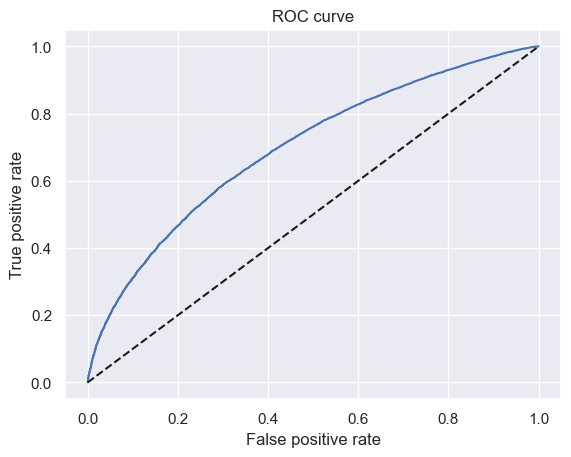

In [208]:
plt.plot(fpr, tpr)
plt.plot(fpr, fpr, linestyle = '--', color = 'k')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')

In [209]:
thresholds

array([1.99595893, 0.99595893, 0.98872579, ..., 0.53085251, 0.5230032 ,
       0.49554367])

In [210]:
df_cutoffs = pd.concat([pd.DataFrame(thresholds), pd.DataFrame(fpr), pd.DataFrame(tpr)], axis = 1)
# We concatenate 3 dataframes along the columns.

In [211]:
df_cutoffs.columns = ['thresholds', 'fpr', 'tpr']

In [212]:
df_cutoffs['thresholds'][0] = 1 - 1 / np.power(10, 16)

/tmp/ipykernel_6626/3197044947.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df_cutoffs['thresholds'][0] = 1 - 1 / np.power(10, 16)


In [213]:
df_cutoffs['Score'] = ((np.log(df_cutoffs['thresholds'] / (1 - df_cutoffs['thresholds'])) - min_sum_coef) * ((max_score - min_score) / (max_sum_coef - min_sum_coef)) + min_score).round()

In [214]:
df_cutoffs['Score'][0] = max_score

/tmp/ipykernel_6626/3137964156.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df_cutoffs['Score'][0] = max_score


In [215]:

def n_approved(p):
    return np.where(df_actual_predicted_probs['y_hat_test_proba'] >= p, 1, 0).sum()

In [216]:
df_cutoffs['N Approved'] = df_cutoffs['thresholds'].apply(n_approved)
df_cutoffs['N Rejected'] = df_actual_predicted_probs['y_hat_test_proba'].shape[0] - df_cutoffs['N Approved']
df_cutoffs['Approval Rate'] = df_cutoffs['N Approved'] / df_actual_predicted_probs['y_hat_test_proba'].shape[0]
df_cutoffs['Rejection Rate'] = 1 - df_cutoffs['Approval Rate']

In [226]:
df_cutoffs.head()

,thresholds,fpr,tpr,Score,N Approved,N Rejected,Approval Rate,Rejection Rate
0,1.000000,0.000000,0.000000,850.0,0,93257,0.000000,1.000000
1,0.995959,0.000000,0.000012,713.0,1,93256,0.000011,0.999989
2,0.988726,0.000000,0.000422,646.0,35,93222,0.000375,0.999625
3,0.988714,0.000097,0.000422,646.0,36,93221,0.000386,0.999614
4,0.988305,0.000097,0.000566,644.0,48,93209,0.000515,0.999485


In [217]:
inputs_train_with_ref_cat.to_csv('inputs_train_with_ref_cat.csv')

In [218]:
df_scorecard.to_csv('df_scorecard.csv')

In [225]:
input


<bound method Kernel.raw_input of <ipykernel.ipkernel.IPythonKernel object at 0x76d8e28653d0>>

In [223]:
df_cutoffs['Score'][6:]

6        643.0
7        643.0
8        640.0
9        640.0
10       636.0
         ...  
17537    367.0
17538    365.0
17539    364.0
17540    362.0
17541    355.0
Name: Score, Length: 17536, dtype: float64